In [1]:
#loading libraries
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from scipy.optimize import curve_fit
from scipy.stats import shapiro
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline
from scipy.stats import lognorm 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Reading in data 

4 qubits

In [2]:
with open("Exact_Sol_STO3G_4Q_UCC_POWELL.txt","r") as f: 
    Ref_Energy_4Q = f.read()
    
print(Ref_Energy_4Q)

-1.0011251956327838


In [3]:
with open("STO3G_4Q_UCC_POWELL.txt","r") as f:
    STO3G_4Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    STO3G_4Q = list(map(float,STO3G_4Q))
print(len(STO3G_4Q))

100


2 qubits

In [4]:
with open("Exact_Sol_STO3G_2Q_UCC_POWELL.txt","r") as f:
    Ref_Energy_2Q = f.read()
    
print(Ref_Energy_2Q)

-1.0011251956327867


In [5]:
with open("STO3G_2Q_UCC_POWELL.txt","r") as f:
    STO3G_2Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    STO3G_2Q = list(map(float,STO3G_2Q))
print(len(STO3G_2Q))

100


1 qubit

In [6]:
with open("Exact_Sol_STO3G_1Q_UCC_POWELL.txt","r") as f:
    Ref_Energy_1Q = f.read()
    
print(Ref_Energy_1Q)

-1.0011251956327858


In [7]:
with open("STO3G_1Q_UCC_POWELL.txt","r") as f:
    STO3G_1Q = f.read().splitlines()
#    vqe_6G.remove("Vqe Result")
    STO3G_1Q = list(map(float,STO3G_1Q))
print(len(STO3G_1Q))

100


### Graphs

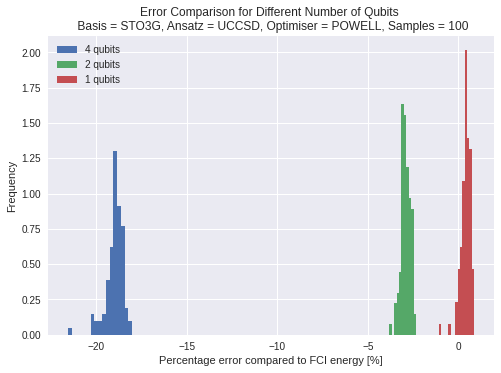

In [9]:
with plt.style.context('seaborn'):
    plt.hist(100*(np.array(STO3G_4Q)-float(Ref_Energy_4Q))/float(Ref_Energy_4Q),density=True,bins='auto',label='4 qubits')
    plt.hist(100*(np.array(STO3G_2Q)-float(Ref_Energy_2Q))/float(Ref_Energy_2Q),density=True,bins='auto',label='2 qubits')
    plt.hist(100*(np.array(STO3G_1Q)-float(Ref_Energy_1Q))/float(Ref_Energy_1Q),density=True,bins='auto',label='1 qubits')
    plt.title('Error Comparison for Different Number of Qubits \n Basis = STO3G, Ansatz = UCCSD, Optimiser = POWELL, Samples = 100')
    plt.xlabel('Percentage error compared to FCI energy [%]')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()